In [1]:
# Import dependencies
# API dependencie(s)
import requests
import json

# Data dependencie(s)
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Pip librarie(s)
from citipy import citipy

# Import API key (.gitignore file)
from keys import api_key

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
city_lat = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list, as well as the associated latitude
    if city not in cities:
        cities.append(city)
        city_lat.append(lat_lng[0])

# Create a dictionary of city and latitude pairs
cities_lat_dict = dict(zip(cities, city_lat))

In [3]:
# API scraping
# Initialize dictionary to store values 
result = {}


log_file = open('api_retrieval_log.txt','w')

# Begin data retieval for each random city
log_file.write("Beginning Data Retrieval" + "\n")
log_file.write("-----------------------------" + "\n")
for index, val in enumerate(cities):
    # Begin exception handling in case city data is not recorded in the data base
    try:
        # Make an API call
        query = f"http://api.openweathermap.org/data/2.5/weather?q={val}&appid={api_key}"
        json_response = requests.get(query).json()

        # Collect temperature data from api (API returns temp in K)
        temp_K = json_response["main"]["temp"]
        temp_F = (9/5) * (temp_K - 273) + 32

        # Collect humidity data (API return a percentage)
        humidity = json_response["main"]["humidity"]

        # Collect cloudiness data (API return a percentage)
        cloudiness = json_response["clouds"]["all"]

        # Collect Wind speed data (API provides units in m/s)
        wind_speed_m_s = json_response["wind"]["speed"]
        wind_speed_mph = wind_speed_m_s * 2.2369

        # Create a dictionary of the cities mapped to these scraped values
        result[val] = [temp_F, humidity,cloudiness,wind_speed_mph]
        
        # Print success of retrieval to notebook
        log_file.write(f"Processing City {index+1} ({val})" + "\n")   
        
    # Print retrieval outcome to     
    except KeyError:
        log_file.write(f"There is no data for city {index+1} ({val}). Skipping" + "\n")

log_file.close()

In [4]:
# Create a data frame that will show all the city data together

# create a list of latitudes from the cities that we would collect data for
processed_lats = []
for key in result:
    processed_lats.append(cities_lat_dict[key])

# Create a data frame out of the result dictionary and processed_lats list
weather_report_df = pd.DataFrame.from_dict(result, orient='index')
weather_report_df["Latitude"] = processed_lats

# Clean up data frame
weather_report_df = weather_report_df.rename(columns ={0:"Temperature (F)",1:"Humidity (%)",\
                                                       2:"Cloudiness (%)", 3:"Wind Speed (mph)"})
weather_report_df["Temperature (F)"] = round(weather_report_df["Temperature (F)"],1)
weather_report_df["Wind Speed (mph)"] = round(weather_report_df["Wind Speed (mph)"],1)

# print head of data frame to notebook
weather_report_df.head()

,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph),Latitude
longonjo,56.4,89,48,2.1,-12.721240
svetlogorsk,30.5,100,90,6.7,66.290498
kaeo,76.3,65,8,3.0,-33.309774
klaksvik,37.7,93,68,15.0,71.590642
ponta do sol,68.0,91,44,2.3,22.267318


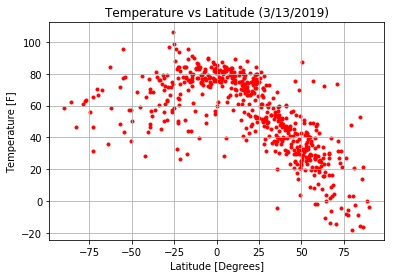

In [5]:
# Create a scatter plot of the Temperature vs the Latitude
plt.scatter(weather_report_df['Latitude'],weather_report_df['Temperature (F)'], marker = ".", color = "red")
plt.xlabel("Latitude [Degrees]")
plt.ylabel("Temperature [F]")
plt.title("Temperature vs Latitude (3/13/2019)")
plt.grid()
plt.savefig("temp_vs_lat.png") # save plt as png to directory

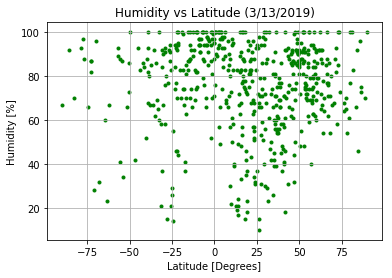

In [6]:
# Create a scatter plot of the Humidity vs the Latitude
plt.scatter(weather_report_df['Latitude'],weather_report_df['Humidity (%)'], marker = ".", color = "green")
plt.xlabel("Latitude [Degrees]")
plt.ylabel("Humidity [%]")
plt.title("Humidity vs Latitude (3/13/2019)")
plt.grid()
plt.savefig("humidity_vs_lat.png") # save plt as png to directory

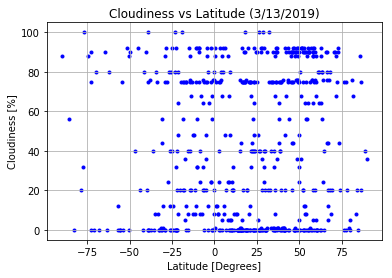

In [7]:
# Create a scatter plot of the Cloudiness vs the Latitude
plt.scatter(weather_report_df['Latitude'],weather_report_df['Cloudiness (%)'], marker = ".", color = "blue")
plt.xlabel("Latitude [Degrees]")
plt.ylabel("Cloudiness [%]")
plt.title("Cloudiness vs Latitude (3/13/2019)")
plt.grid()
plt.savefig("cloudiness_vs_lat.png") # save plt as png to directory

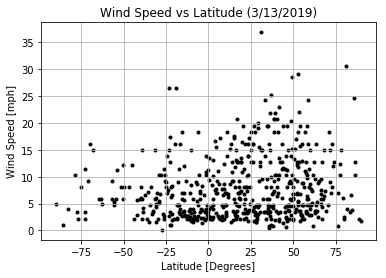

In [8]:
# Create a scatter plot of the Wind Speed vs the Latitude
plt.scatter(weather_report_df['Latitude'],weather_report_df['Wind Speed (mph)'], marker = ".", color = "black")
plt.xlabel("Latitude [Degrees]")
plt.ylabel("Wind Speed [mph]")
plt.title("Wind Speed vs Latitude (3/13/2019)")
plt.grid()
plt.savefig("wind_speed_vs_lat.png") # save plt as png to directory

In [9]:
# Perform once at the end of notebook
plt.show()